In [15]:
#Import assignment dataset
!curl https://raw.githubusercontent.com/NZMSA/2020-Phase-1/master/Machine%20Learning%20and%20Data%20Science/Dataset%20for%20Assignment.csv -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  118k  100  118k    0     0   294k      0 --:--:-- --:--:-- --:--:--  294k


## Importing, modifying, and cleaning dataset

In [1]:
#Import libraries
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [17]:
#Read and show assignment dataset
df = pd.read_csv('Dataset%20for%20Assignment.csv')
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [18]:
#Function to get population of SA1 of house
def get_pop(lat, lon):
    
    #URL of API
    url = 'https://koordinates.com/services/query/v1/vector.json'
    
    #Parameters for API
    key = '922fbede85634e46900d2ab5b5fb46ee'
    layer = '104612'

    params = {
        'key' : key,
        'layer' : layer,
        'x': lon,
        'y' : lat
    }

    #Request API
    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return pd.Series({'Population' : response.status_code})
    
    #Get Population
    pop = response.json()['vectorQuery']['layers'][layer]['features'][0]['properties']['C18_CURPop']
    
    return pd.Series({'Population' : pop})

In [19]:
#Get population of every row in dataframe
df['Population'] = df.apply(lambda row: get_pop(row['Latitude'], row['Longitude']), axis=1)
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231


In [20]:
#Turn dataset with population to csv file
df.to_csv('dataset_with_pop.csv')

In [11]:
#Read deprivation index excel file
di = pd.read_excel('Deprivation Index.xlsx')

In [45]:
#Show deprivation index
di.head()

,SA1,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


In [50]:
#Add Deprivation Index to row in dataframe where SA1 is equal
df = df.merge(di[['SA1', 'NZDep2018']], how = 'left', left_on = 'SA1', right_on = 'SA1')

In [52]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [53]:
#Turn dataset with population and deprivation index to csv file
df.to_csv('dataset_with_pop_and_di.csv')

In [2]:
df = pd.read_csv('dataset_with_pop_and_di.csv')

In [4]:
df.head()

,Unnamed: 0,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
0,0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [3]:
#Dropping duplicate index row
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [6]:
#Rows and columns of dataset
df.shape

(1051, 17)

In [7]:
#Check datatype of each column
df.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area       object
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
Population       int64
NZDep2018      float64
dtype: object

In [8]:
#Land area should be integer, not object
#Show unique values of Land Area
df['Land area'].unique()

array(['714', '564', '626', '65', '601', '100', '531', '1024', '80',
       '204', '170', '637', '640', '650', '138', '75', '724', '429',
       '520', '1381', '732', '799', '1105', '463', '681', '4068', '106',
       '713', '211', '402', '883', '883 m²', '675', '388', '1034', '1295',
       '1102', '551', '809', '1108', '745', '613', '758', '727', '59',
       '260 m²', '126', '615', '756', '3609', '431', '3648', '3177',
       '545', '420 m²', '481', '279', '120', '1037', '202', '1031', '602',
       '810', '475', '736', '110', '99', '153', '245', '2567 m²', '1500',
       '885', '480', '377', '688', '10557', '405', '561', '255', '519',
       '522', '651', '559', '420', '472', '1067', '726', '251', '220',
       '1467', '701', '826', '743', '272', '672', '772', '318', '895',
       '2028', '371', '93', '286', '623', '479', '113', '469', '898',
       '370', '422', '868', '880', '690', '238', '569', '8000', '8129',
       '447', '744', '630', '415', '804', '323', '728', '580', '140',

In [4]:
#Some land area values have m², need to be removed and changed to integer
df['Land area'] = df['Land area'].str.extract('(\d+)').astype(float)

In [8]:
#Show land area has no values with m² and turned from string to float
df['Land area'].unique()

array([  714.,   564.,   626.,    65.,   601.,   100.,   531.,  1024.,
          80.,   204.,   170.,   637.,   640.,   650.,   138.,    75.,
         724.,   429.,   520.,  1381.,   732.,   799.,  1105.,   463.,
         681.,  4068.,   106.,   713.,   211.,   402.,   883.,   675.,
         388.,  1034.,  1295.,  1102.,   551.,   809.,  1108.,   745.,
         613.,   758.,   727.,    59.,   260.,   126.,   615.,   756.,
        3609.,   431.,  3648.,  3177.,   545.,   420.,   481.,   279.,
         120.,  1037.,   202.,  1031.,   602.,   810.,   475.,   736.,
         110.,    99.,   153.,   245.,  2567.,  1500.,   885.,   480.,
         377.,   688., 10557.,   405.,   561.,   255.,   519.,   522.,
         651.,   559.,   472.,  1067.,   726.,   251.,   220.,  1467.,
         701.,   826.,   743.,   272.,   672.,   772.,   318.,   895.,
        2028.,   371.,    93.,   286.,   623.,   479.,   113.,   469.,
         898.,   370.,   422.,   868.,   880.,   690.,   238.,   569.,
      

In [11]:
#Check datatype of each column
df.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area      float64
CV               int64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
Population       int64
NZDep2018      float64
dtype: object

In [5]:
#Rename columns
df = df.rename(columns={'NZDep2018' : 'Deprivation Index',
                        'CV' : 'Capital Value'})

In [6]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714.0,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564.0,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626.0,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65.0,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601.0,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,9.0


In [7]:
#Check if dataset has null values
df[df.isnull().values.any(axis=1)].head()

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214.0,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245.0,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,252,2.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141.0,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0


In [13]:
#Find suburb of house 568 using SA1 and Deprivation Index dataset
di.loc[di['SA1'] == 7001131]

,SA1,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
1131,7001131,9.0,1122.0,156,111800,Barrier Islands


In [20]:
#Find suburb name from existing data
df['Suburbs'].unique()

array(['Manurewa', 'Karaka', 'Onehunga', 'Clover Park', 'Mangere Bridge',
       'Ponsonby', 'One Tree Hill', 'Massey', 'Hillcrest', 'Avondale',
       'Mount Roskill', 'Silverdale', 'Royal Oak', 'Schnapper Rock',
       'Titirangi', 'Kingsland', 'Highland Park', 'Matakatia',
       'Stonefields', 'Mount Albert', 'Mission Bay', 'Epsom', 'Pukekohe',
       'Hillsborough', 'Pakuranga', 'Oneroa', 'Sunnyvale', 'Papatoetoe',
       'Gulf Harbour', 'Meadowbank', 'Pahurehure', 'Mount Eden',
       'Goodwood Heights', 'Orakei', 'Belmont', 'Remuera',
       'Randwick Park', 'Farm Cove', 'Clendon Park', 'New Lynn',
       'Glenfield', 'Glen Eden', 'Ellerslie', 'Kaipara Flats',
       'Te Atatu South', 'Grey Lynn', 'Mount Wellington', 'Takanini',
       'Orewa', 'Flat Bush', 'Helensville', 'Otara', 'Red Beach',
       'Papakura', 'Three Kings', 'Ranui', 'Windsor Park', 'Milford',
       'Leigh', 'Glendene', 'Drury', 'Birkenhead', 'Stanmore Bay',
       'Saint Johns', 'Birkdale', 'Panmure', 'Warkw

In [6]:
#Fill suburb value of house 568
df.at[568,'Suburbs'] = 'Great Barrier Island (Aotea Island)'

In [31]:
#Check if row was filled
df.loc[568]['Suburbs']

'Great Barrier Island (Aotea Island)'

In [24]:
#Get mean value of bathrooms of houses with 4 bedrooms
df.loc[df['Bedrooms'] == 4]['Bathrooms'].mean()

2.213675213675214

In [7]:
#Fill bathrooms value of house 309 and 311 with mean value of bathroom of houses with 4 bedrooms
df.at[309,'Bathrooms'] = 2.0
df.at[311,'Bathrooms'] = 2.0

In [32]:
#Check if rows were filled
df.loc[309]['Bathrooms']
df.loc[311]['Bathrooms']

2.0

In [10]:
#Check if dataset has null values
df[df.isnull().values.any(axis=1)].head()

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index


## Analysing dataset statistics

In [11]:
#Statistical summary of dataset
df.describe()

,Bedrooms,Bathrooms,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,Deprivation Index
count,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073264,856.989534,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,5.063749
std,1.169412,0.992044,1588.156219,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.913471
min,1.000000,1.000000,40.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,3.000000,1.000000,321.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,571.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,5.000000
75%,4.000000,3.000000,825.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,22240.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,10.000000


The maximum bedrooms is 17 which is far off the mean at around 3.8 bedrooms, this seems to be an outlier from the rest of the data. Land area has a large range, as the minimum area is just 40m² and the maximum area is 22240 m². The minimum captial value is $270,000 which is far off the mean at around 1.4 million dollars, this seems to be an outlier from the rest of the data. The mean population for 0-19 year olds is almost double the mean population of the other age groups, there are some areas with 0 population of certain age groups as well. Population has a large range as the minimum is 3 whereas the maximum is 789, the mean of around 180, being far from these two values as well. The mean deprivation index is around 5, which is expected as it's a score from 1-10.

## Investigating Outliers

In [12]:
#Check house with 17 bedrooms
df.loc[df['Bedrooms'] == 17]

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
611,17,8.0,"Sandringham Auckland City 1025 Sandringham, ...",1596.0,760000,-36.883613,174.738889,7004981,21,21,18,21,9,12,Sandringham,111,6.0


Along with being the house with the maximum bedrooms, it also has the maximum bathrooms. Its land area is also in the third quantile of the dataset so I'm led to believe this isn't an input error.

In [15]:
#Check house with 40m² land area
df.loc[df['Land area'] == 40]

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
628,2,1.0,"2/66 South Pacific Road Rakino Island, Auckland",40.0,3250000,-36.719672,174.951524,7001354,0,0,0,0,0,6,Rakino Island,27,6.0


The house is located on an island and the house has relatively low bedroms,bathrooms, and capital value. It's also just a fraction of a full lot due to the "2/66" in the address. Because of this, this  doesn't seem like an input error.

In [16]:
df.loc[df['Land area'] == 22240]

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
566,3,2.0,"10 Goudie Road Helensville, Auckland",22240.0,1075000,-36.68885,174.388196,7001262,45,12,15,27,27,39,Helensville,165,3.0


As the house is located in Helensville, a fairly rural area, it's possible the land area can be very high and it doesn't seem to be an input error.

In [17]:
df.loc[df['Capital Value'] == 270000]

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
627,3,2.0,"25 Ocean View Crescent Rakino Island, Auckland",1366.0,270000,-36.719592,174.949563,7001354,0,0,0,0,0,6,Rakino Island,27,6.0


As the house is located in an island with a low population and an above average deprivation index, it makes sense that the capital value is that low, meaning, this doesn't seem to be an input error.

## Analysing dataset graphs and correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb167072ba8>,
      dtype=object)

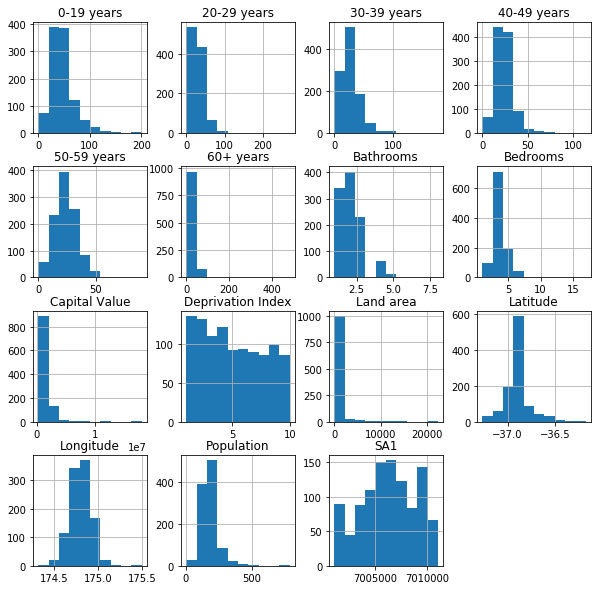

In [18]:
#Draw histograms of numerical columns
df.hist(figsize=(10,10))

The population histograms are skewed to the right, so most areas have a small population while only some areas have a larger population. This is emphasized by the histogram of the 60+ age group where it is extremely skewed to the right. Most houses seem to have less bathrooms, bedrooms, capital value, and land area while only a few houses have really large values of those columns. Deprivation index has a slight decline as deprivation index increases, meaning there's slightly less deprived areas. Latitude, longitude, and Statistical Area 1 are approximately normally distributed. As capital value and land area seem to be extremely skewed, I'll log transform them to try to improve it.

In [8]:
#Log transform capital value and land area
df['Capital Value'] = np.log(df['Capital Value'])
df['Land area'] = np.log(df['Land area'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24fee85b38>,
      dtype=object)

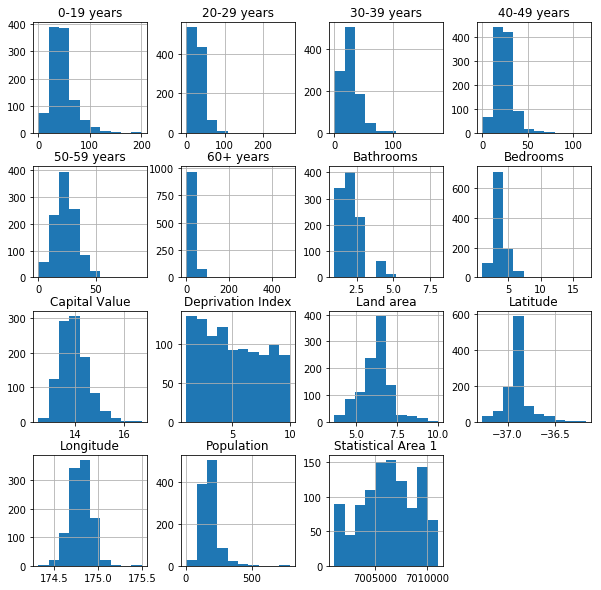

In [19]:
#Draw histograms of numerical columns
df.hist(figsize=(10,10))

The log transformation helps us show that capital value is right skewed while land area is left skewed.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


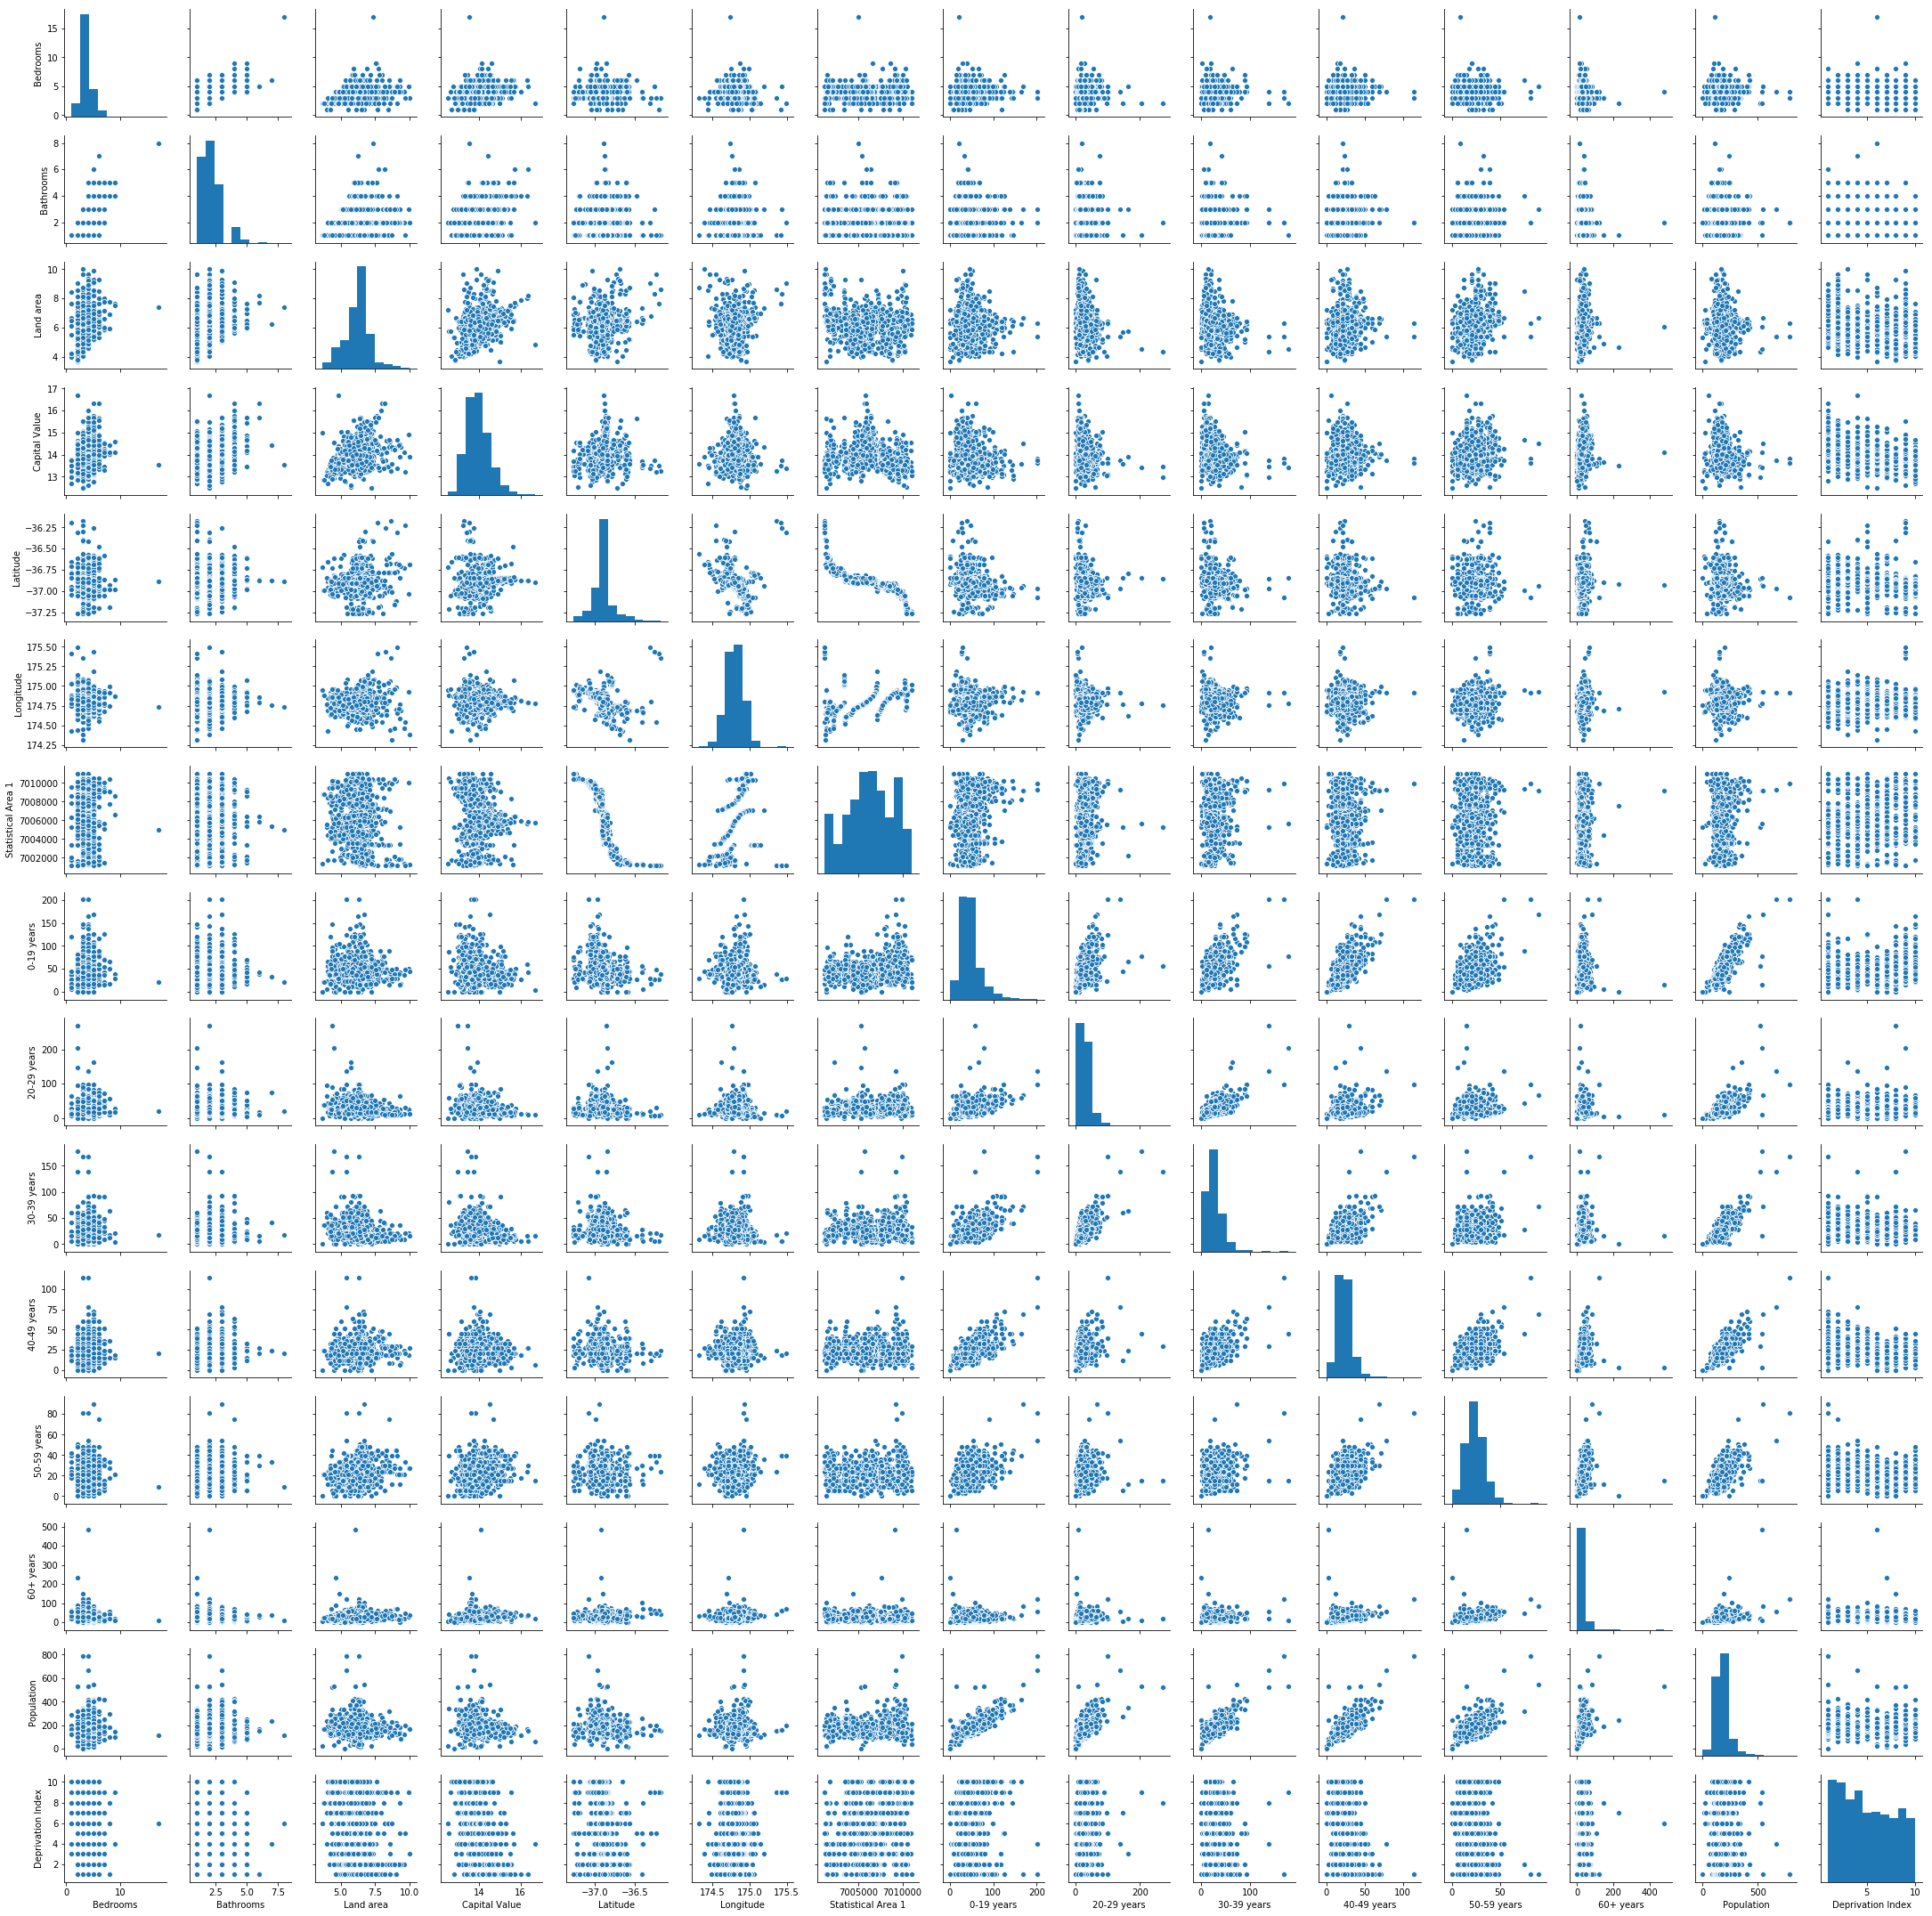

In [18]:
#Explore general patterns in data
sns.pairplot(df, size = 2.0)

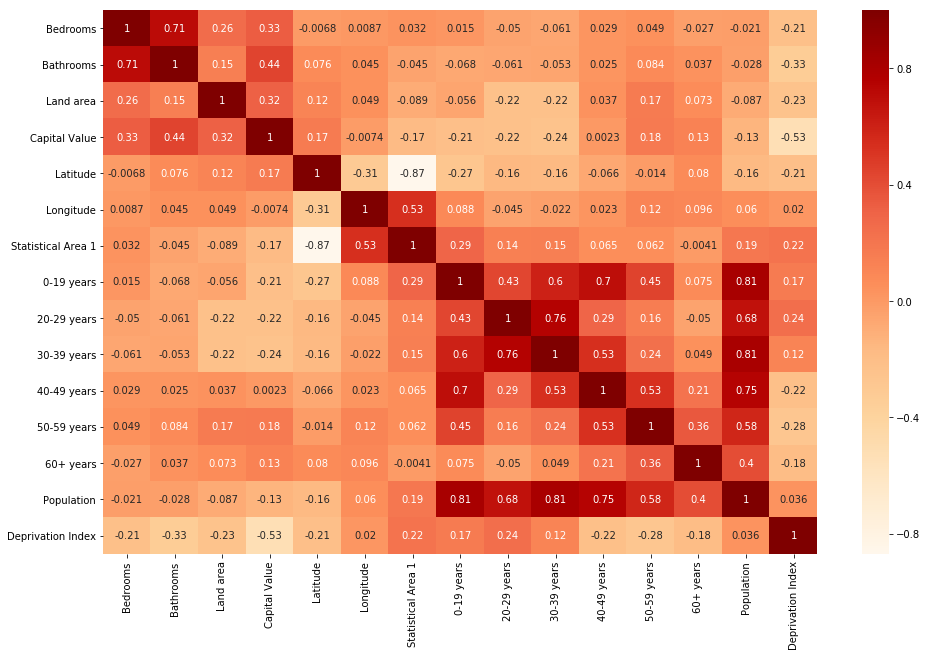

In [20]:
#Check what variables are correlated
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

From the histograms and the correlation matrix, we see that as the number of bedrooms in a house increases, the number of bathrooms also increase. There's a negative correlation between lattitude and SA1 and a positive correlation between longitude and SA1, which signals that the Statistical Area is ordered by location. Lastly, there's the obvious positive correlations with population and the population of each age group, as the population increases, the population of each age group also increases. This can be misleading as some areas can have different proportions of age groups, showing this proportion is better than just showing the population of each age group, so I'm changing it to the percentage of the population for each age group. There aren't any significant correlations with capital value which is worrying on trying to make a machine learning model on trying to predict it.

In [9]:
#Change population of each age group to percentages
df['0-19 years'] = df['0-19 years'] / df['Population']
df['20-29 years'] = df['20-29 years'] / df['Population']
df['30-39 years'] = df['30-39 years'] / df['Population']
df['40-49 years'] = df['40-49 years'] / df['Population']
df['50-59 years'] = df['50-59 years'] / df['Population']
df['60+ years'] = df['60+ years'] / df['Population']

In [22]:
#Check age group was changed
df.head()

,Bedrooms,Bathrooms,Address,Land area,Capital Value,Latitude,Longitude,Statistical Area 1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,Deprivation Index
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",6.570883,13.774689,-37.012920,174.904069,7009770,0.275862,0.155172,0.137931,0.120690,0.137931,0.120690,Manurewa,174,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",6.335054,14.038654,-37.063672,174.922912,7009991,0.325581,0.139535,0.093023,0.162791,0.116279,0.232558,Karaka,129,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",6.439350,14.038654,-37.063580,174.924044,7009991,0.325581,0.139535,0.093023,0.162791,0.116279,0.232558,Karaka,129,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",4.174387,13.514405,-36.912996,174.787425,7007871,0.350000,0.050000,0.175000,0.175000,0.100000,0.125000,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",6.398595,13.353475,-36.979037,174.892612,7008902,0.402597,0.116883,0.142857,0.129870,0.090909,0.142857,Clover Park,231,9.0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


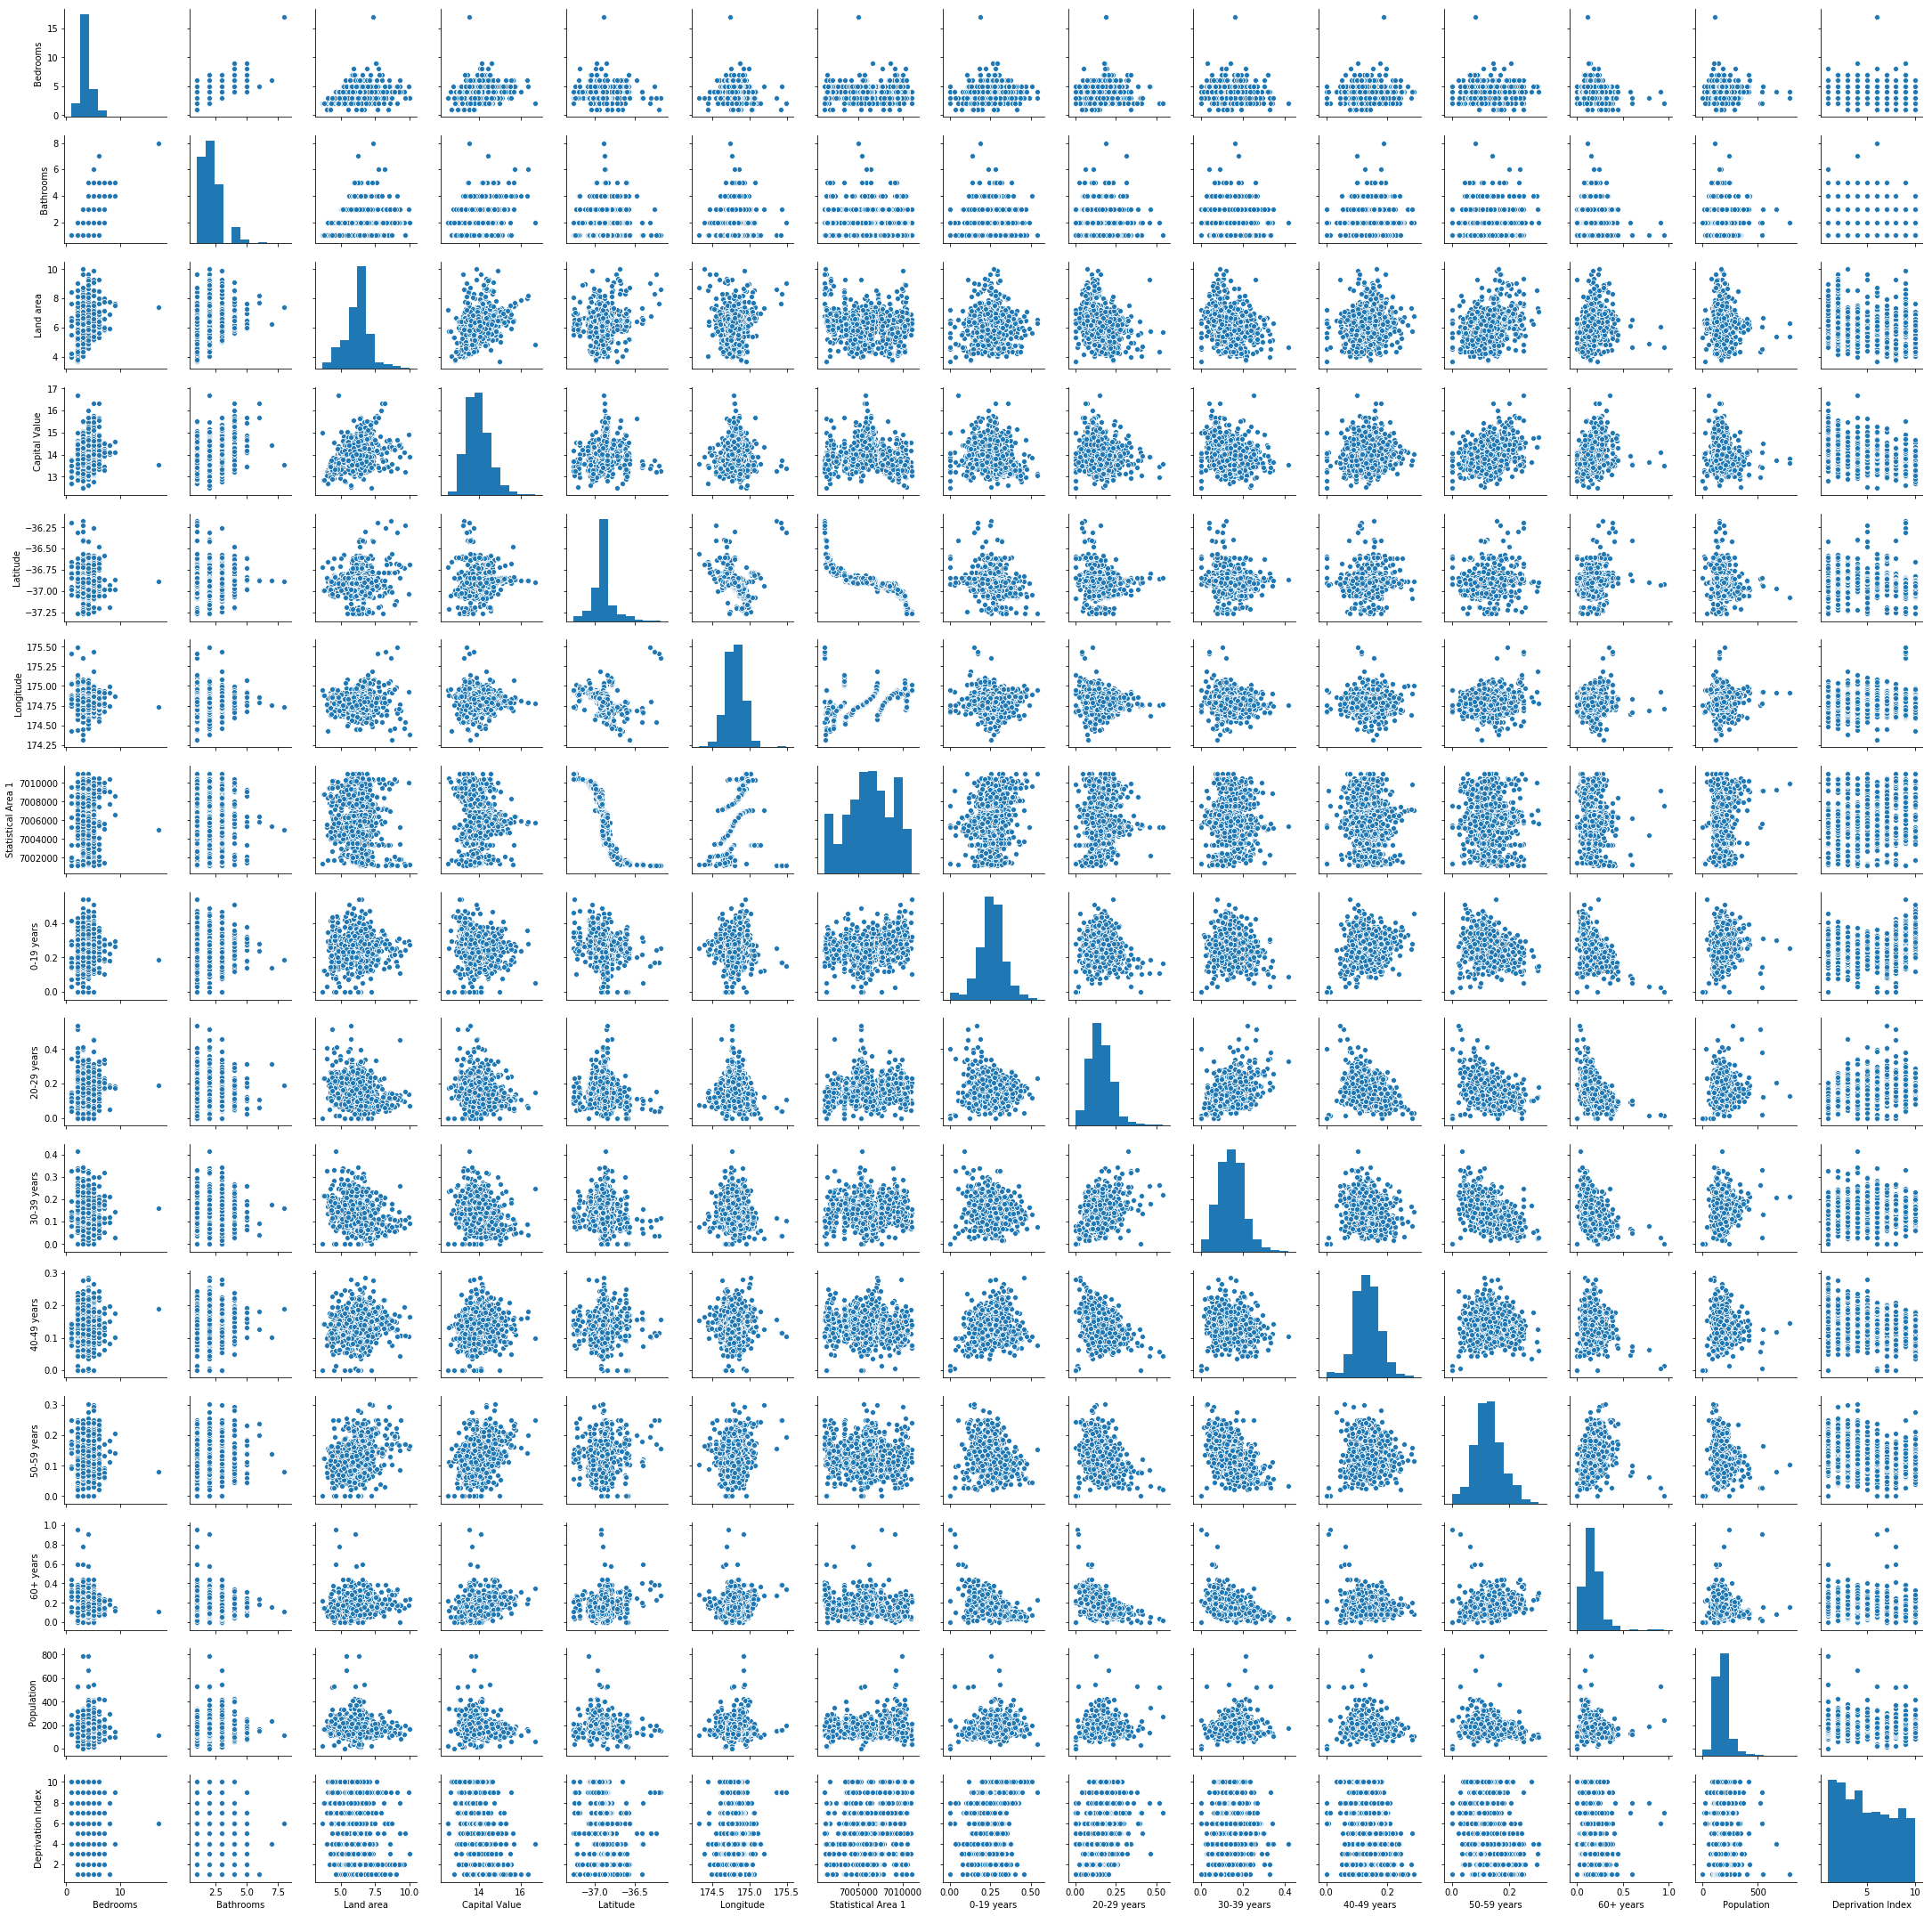

In [23]:
#Explore general patterns in data
sns.pairplot(df, size = 2.0)

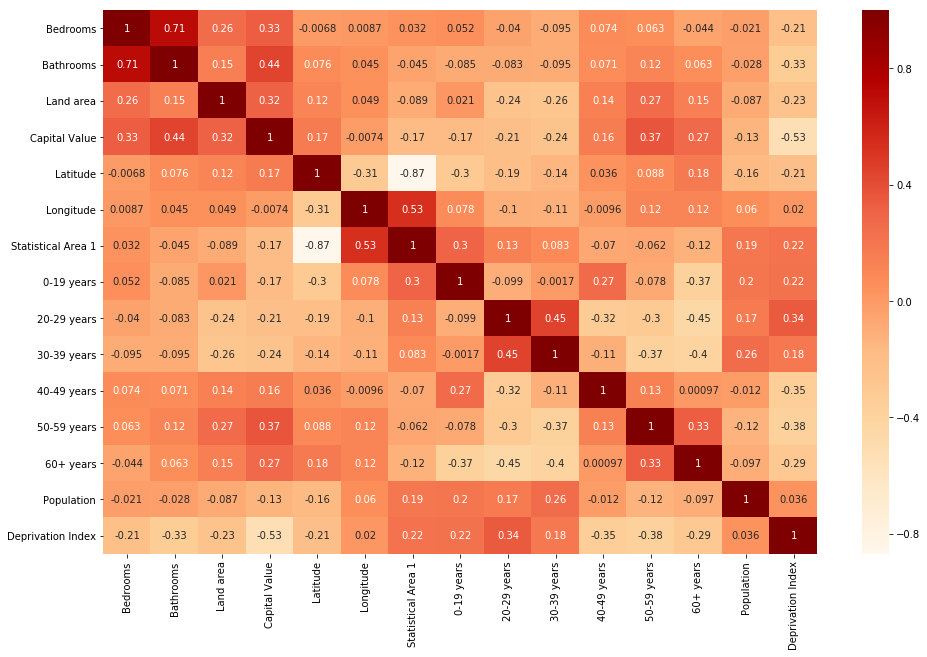

In [24]:
#Check what variables are correlated
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

Though changing age groups to percentages has decreased they're correlation with population, it has increased it's correlation with capital value which will help with the machine learning model.

## Building Machine Learning Model

In [37]:
#Input data
x = df.drop(['Capital Value', 'Address', 'Suburbs', 'Longitude'], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,Deprivation Index
0,5,3.0,6.570883,-37.012920,7009770,0.275862,0.155172,0.137931,0.120690,0.137931,0.120690,174,6.0
1,5,3.0,6.335054,-37.063672,7009991,0.325581,0.139535,0.093023,0.162791,0.116279,0.232558,129,1.0
2,6,4.0,6.439350,-37.063580,7009991,0.325581,0.139535,0.093023,0.162791,0.116279,0.232558,129,1.0
3,2,1.0,4.174387,-36.912996,7007871,0.350000,0.050000,0.175000,0.175000,0.100000,0.125000,120,2.0
4,3,1.0,6.398595,-36.979037,7008902,0.402597,0.116883,0.142857,0.129870,0.090909,0.142857,231,9.0


For the input dataset, I've dropped capital value as that's what we're trying to predict. I dropped address and suburbs as they're non numerical columns and Statistical Area and lattitude already describes location. I've also dropped longitude as it has less than a 0.1 corelation with capital value on the correlation matrix.

In [38]:
#Output data
y = df['Capital Value']
y.head()

0    13.774689
1    14.038654
2    14.038654
3    13.514405
4    13.353475
Name: Capital Value, dtype: float64

In [39]:
#Splitting data into train and test datasets
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.3,random_state=42)

I've split the data up, using 70% of the data for training and 30% for testing. I used a random state of 42 to keep results consistent.

In [40]:
#We're using linear regression machine learning model
model = LinearRegression()

In [41]:
#Train the model
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#Give coefficients of model
#The gradient of each x value
model.coef_

array([-4.30825699e-06,  1.64678901e-01,  8.05040086e-02,  1.27948668e-02,
       -6.67434852e-06, -5.32176725e-02,  5.74711371e-01, -6.39935163e-01,
        5.81816485e-02,  1.27376248e+00,  6.44955000e-01, -4.14015175e-04,
       -6.57548302e-02])

In [43]:
#Test the model using test data
predicted = model.predict(test_x)

Text(0, 0.5, 'Predicted Capital Value')

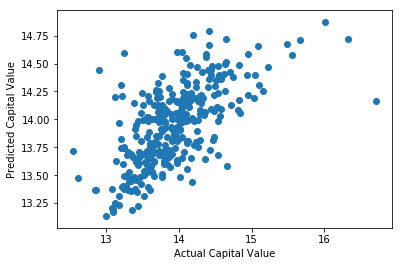

In [44]:
#Scatterplot of predicted capital value vs actual capital value
plt.scatter(test_y,predicted)
plt.xlabel('Actual Capital Value')
plt.ylabel('Predicted Capital Value')

In [45]:
# Gives the R^2 (coefficient of determination) of the model
model.score(test_x,test_y)

0.4194872330555723

In [19]:
#Use lasso model and get R^2 score
model = Lasso(alpha=0.1)
model.fit(train_x, train_y)
predicted = model.predict(test_x)
model.score(test_x,test_y)

0.324353175002132

In [57]:
#Use decision tree regressor model and get R^2 score
model = DecisionTreeRegressor(max_depth=5)
model.fit(train_x, train_y)
predicted = model.predict(test_x)
model.score(test_x,test_y)

0.3669835612804371